# Danish fire insurance data

In [152]:
%run preamble_notebooks.py
danish = pd.read_csv("../Data/Danish/danish.csv").x
from graph_methods import *

## Descriptive statistics

In [153]:
print(danish.describe().to_latex(float_format="%.2f"))

\begin{tabular}{lr}
\toprule
{} &       x \\
\midrule
count & 2492.00 \\
mean  &    3.06 \\
std   &    7.98 \\
min   &    0.31 \\
25\%   &    1.16 \\
50\%   &    1.63 \\
75\%   &    2.65 \\
max   &  263.25 \\
\bottomrule
\end{tabular}



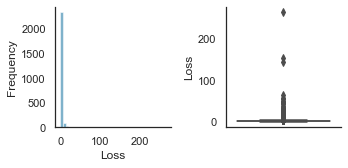

In [154]:
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(5, 2.5))
num_bins = 40
# the histogram of the data
n, bins, patches = axs[0].hist(danish, num_bins, alpha=0.5, color = '#006699')

g = sns.boxplot(ax = axs[1], data = danish)
for i,box in enumerate(g.artists):
        box.set_facecolor('#006699')
axs[0].set_xlabel("Loss")
axs[0].set_ylabel("Frequency")
axs[1].set_ylabel("Loss")
axs[1].set_xticks([])
# plt.show()
sns.despine()
plt.savefig("../../SMCLoMo/Figures/hist_boxplot_danish_en.pdf")

In [155]:
threshold = pd.read_csv("../Data/Danish/tea_threshold.csv")
print(threshold[["threshold", "method"]].to_latex(float_format="%.2f"))

\begin{tabular}{lrl}
\toprule
{} &  threshold &                                     method \\
\midrule
0 &       2.46 &                      AMSE Caeiro and Gomes \\
1 &      14.39 &                         Drees and Kauffman \\
2 &      25.29 &                      eye Danielsson et al. \\
3 &       4.61 &  Gerstengarbe plot Gerstengarbe and Werner \\
4 &      12.06 &                  exp test Guillou and Hall \\
5 &       1.43 &               double bootsrap Gomes et al. \\
6 &       4.09 &                      Single bootstrap Hall \\
7 &       1.50 &                             Hall and Welsh \\
\bottomrule
\end{tabular}



## Importation of the fiting data

In [156]:
import pickle
single_model_df_import = pd.read_csv("../Data/Danish/danish_single_model_fit_.csv").drop(columns = ["Unnamed: 0"], axis = 1)
single_model_df_import["threshold_estimation"] = None
single_model_names = single_model_df_import["model"].values
selec = np.logical_or(np.logical_or(single_model_names == "Lognormal-Pareto", single_model_names == "Gamma-Pareto") ,  single_model_names == "Weibull-Pareto")
threshold_estimation = single_model_df_import["threshold_estimation"].values
threshold_estimation[selec] = "simultaneous"
single_model_df_import["threshold_estimation"] =  threshold_estimation
single_model_df_import["Body"] =  None
single_model_df_import["Tail"] =  None
single_model_df_import["Type"] =  None
with open('../Data/Danish/trace_danish_single_models.obj', 'rb') as fp:
    fit_single_dic_import = pickle.load(fp)
spliced_model_fixed_threshold_df_import = pd.read_csv("../Data/Danish/danish_spliced_models_fixed_threshold.csv").drop(columns = ["Unnamed: 0", "posterior_probability"], axis = 1)
spliced_model_fixed_threshold_df_import["threshold_estimation"] = "fixed"
with open('../Data/Danish/trace_danish_spliced_models_fixed_threshold.obj', 'rb') as fp:
    fit_spliced_fixed_threshold_dic_import = pickle.load(fp)
strip_model_names = pd.DataFrame([np.char.split(spliced_model_fixed_threshold_df_import["model"].values[k], sep = "_").tolist() for k in range(len(spliced_model_fixed_threshold_df_import))])
strip_model_names.columns = ["Body", "Tail", "Type"]
spliced_model_fixed_threshold_df_import = spliced_model_fixed_threshold_df_import.join(strip_model_names)

loss_model_df = pd.concat([single_model_df_import,spliced_model_fixed_threshold_df_import])
fit_loss_model_dic = {**fit_single_dic_import, **fit_spliced_fixed_threshold_dic_import}

loss_models = ["Log-Logistic", "Lomax", "Burr", "Exp", "Gamma", "Weibull", "Inverse-Gaussian", "Lognormal", "Inverse-Weibull", "Inverse-Gamma"]

for loss_model in loss_models:
    spliced_model_df_import = pd.read_csv("../Data/Danish/danish_splicing_model_fit_"+loss_model+".csv").drop(columns = ["Unnamed: 0", "posterior_probability"], axis = 1)
    spliced_model_df_import["threshold_estimation"] = "simultaneous"
    strip_model_names = pd.DataFrame([np.char.split(spliced_model_df_import["model"].values[k], sep = "_").tolist() for k in range(len(spliced_model_df_import))])
    strip_model_names.columns = ["Body", "Tail", "Type"]
    spliced_model_df_import = spliced_model_df_import.join(strip_model_names)

    loss_model_df = pd.concat([loss_model_df, spliced_model_df_import])
    with open("../Data/Danish/trace_danish_"+loss_model+".obj", 'rb') as fp:
        fit_spliced_dic_import = pickle.load(fp)
loss_model_df = loss_model_df.replace("disjoint", "discontinuous")
loss_model_df

,model,d,γ_map,log_marg,DIC,WAIC,Wass_dist,threshold_estimation,Body,Tail,Type
0,Exp,1,0.31,"-5,285.71","10,560.54","10,570.70","3,290.20",None,None,None,None
1,Gamma,2,0.31,"-5,251.61","10,481.99","10,508.91","3,325.55",None,None,None,None
2,Weibull,2,0.31,"-5,279.98","10,536.73","10,565.72","3,200.66",None,None,None,None
3,Inverse-Gaussian,2,0.31,"-4,526.18","9,028.53","9,046.54","2,674.28",None,None,None,None
4,Lognormal,2,0.31,"-4,445.05","8,863.59","8,874.16","2,362.39",None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
31,Inverse-Gamma_Inverse-Gamma_simple,5,0.82,"-3,823.53","7,581.19","7,593.16",798.89,simultaneous,Inverse-Gamma,Inverse-Gamma,simple
32,Inverse-Gamma_Inverse-Gamma_disjoint,6,0.82,"-3,823.53","7,574.73","7,592.03",796.42,simultaneous,Inverse-Gamma,Inverse-Gamma,discontinuous
33,Inverse-Gamma_Inverse-Weibull_continuous,5,0.94,"-3,860.13","7,656.62","7,678.66",470.13,simultaneous,Inverse-Gamma,Inverse-Weibull,continuous
34,Inverse-Gamma_Inverse-Weibull_simple,5,0.82,"-3,806.97","7,562.25","7,574.66",719.55,simultaneous,Inverse-Gamma,Inverse-Weibull,simple


## Analysis of the composite models with free threshold 

### Goodness of fit comparisons

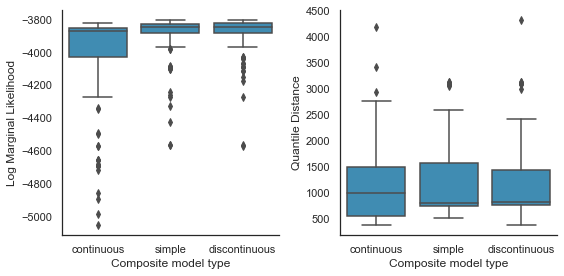

In [159]:
# selec = np.logical_and(np.logical_and(loss_model_df["Type"].values != None, loss_model_df["threshold_estimation"].values == "simultaneous") , loss_model_df["Type"].values != "simple")
selec =np.logical_and(loss_model_df["Type"].values != None, loss_model_df["threshold_estimation"].values == "simultaneous")
sub_df = loss_model_df.iloc[selec].reset_index(drop=True)
sns.set_theme(style="white")
fig, axs = plt.subplots(1, 2, sharex=True, figsize=(8,4))
g = sns.boxplot(ax = axs[0], x="Type", y="log_marg", data=loss_model_df.iloc[selec])
g.set(xlabel="Composite model type", ylabel="Log Marginal Likelihood")
for i,box in enumerate(g.artists):
    box.set_facecolor((0, 0.4, 0.6, 0.75))

g = sns.boxplot(ax = axs[1], x="Type", y="Wass_dist", data=loss_model_df.iloc[selec])
g.set(xlabel="Composite model type", ylabel="Quantile Distance")
for i,box in enumerate(g.artists):
    box.set_facecolor((0, 0.4, 0.6, 0.75))
fig.tight_layout()
sns.despine()
plt.savefig("../../SMCLoMo/Figures/boxplot_danish_log_marg_Wass_free_threshold.pdf")

### Combination of models comparisons

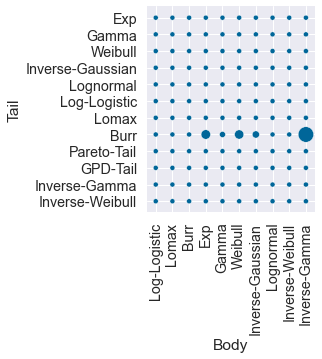

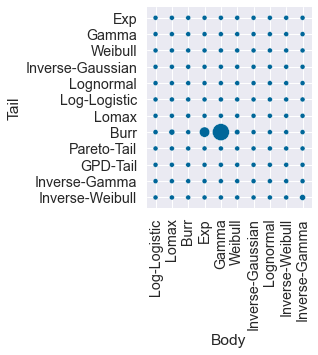

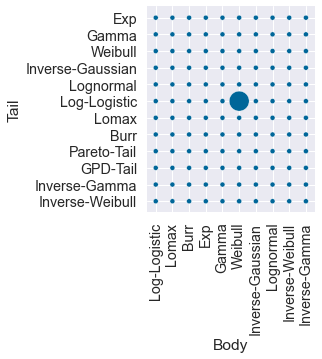

In [160]:
sns.set_theme(style="white")

compo_model_types = ["discontinuous", "simple", "continuous"]
sns.set(font_scale=1.3)
for compo_model_type in compo_model_types:
    
    s = np.logical_and(loss_model_df["Type"].values == compo_model_type, loss_model_df["threshold_estimation"].values == "simultaneous")  
    sub_df = loss_model_df.iloc[s].reset_index(drop=True)
    model_grid(sub_df, "log_marg", 0.01, 0.01)
    # fig.figure(figsize=[5,5])
    fig.tight_layout()
    plt.savefig("../../SMCLoMo/Figures/model_grid_danish_w_"+compo_model_type+"_free_threshold.pdf", bbox_inches='tight')

### Value of the threshold

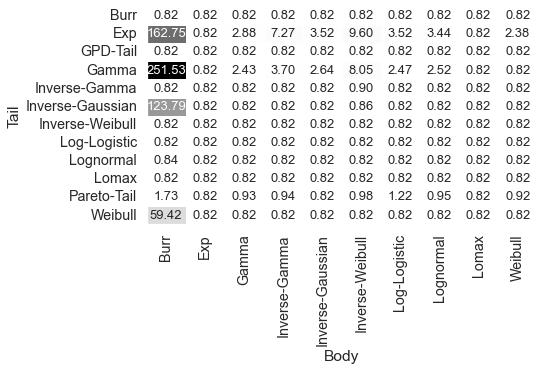

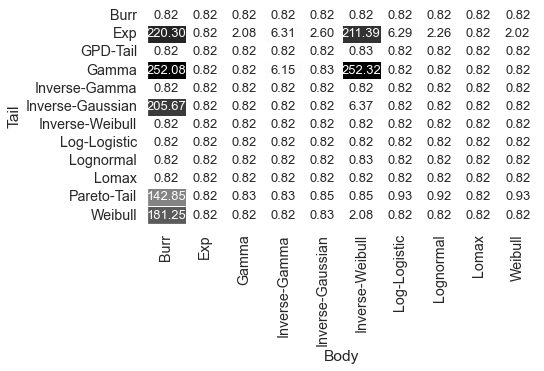

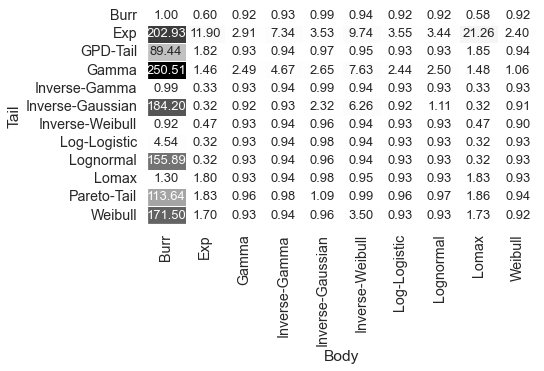

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")
sns.set(font_scale=1.3)
pd.options.display.float_format = '{:,.2f}'.format
# Load the example flights dataset and convert to long-form
# flights_long = sns.load_dataset("flights")
compo_model_types = ["discontinuous", "simple", "continuous"]
for compo_model_type in compo_model_types:

    s =  np.logical_and(np.logical_and(loss_model_df["threshold_estimation"].values == "simultaneous", loss_model_df["Body"].values != None), loss_model_df["Type"].values == compo_model_type)
    sub_df = loss_model_df.iloc[s].reset_index(drop=True)
    hm_df = sub_df.pivot("Tail", "Body", "γ_map")
    # hm_df.values
    # # Draw a heatmap with the numeric values in each cell
    f, ax = plt.subplots(figsize=(7, 4))
    sns.heatmap(hm_df, annot=True, annot_kws={"size": 13}, linewidths=1, fmt='.2f', ax=ax, cmap = "Greys",cbar=False)
    fig.tight_layout()
    sns.despine()
    plt.savefig("../../SMCLoMo/Figures/model_grid_danish_thresh_"+compo_model_type+"_free_threshold.pdf", bbox_inches='tight')

## Posterior plots of Weibull Log logistic continuous versus discontinuous

In [169]:
X = danish.values
f1, f2 = bs.loss_model("Weibull", np.array(["k1", "β1"])), bs.loss_model("Log-Logistic", np.array(["β2", "σ2"]))
f = bs.spliced_loss_model(f1, f2, "continuous")
k1_prior, β1_prior, β2_prior, σ2_prior,  γ_prior  = bs.prior_model("gamma", "k1", 1, 1), bs.prior_model("gamma", "β1", 1, 1), bs.prior_model("gamma", "β2", 1, 1), bs.prior_model("gamma", "σ2", 1, 1), \
bs.prior_model("uniform", "γ", min(X), max(X))
# The smc function deliver the trace, the log marginal likelihood along with some information criteria
prior_spliced_model = bs.independent_priors([k1_prior, β1_prior, β2_prior, σ2_prior,  γ_prior])
popSize = 20000
%time trace, log_marg, DIC, WAIC = bs.smc(X, f, popSize, prior_spliced_model, paralell = True)

Sample generation 0 from the gamma-gamma-gamma-gamma-uniform prior distribution
Generation: 1 ;temperature: 0.00011730194091796875 ;ESS: 10006 ;steps:3 ;particle moved: 99.955%
Generation: 2 ;temperature: 0.0008544489505766251 ;ESS: 10010 ;steps:3 ;particle moved: 99.97%
Generation: 3 ;temperature: 0.002172817050314437 ;ESS: 9995 ;steps:3 ;particle moved: 99.83%
Generation: 4 ;temperature: 0.0037551491611387483 ;ESS: 9998 ;steps:3 ;particle moved: 99.71%
Generation: 5 ;temperature: 0.0054904331858919575 ;ESS: 10002 ;steps:3 ;particle moved: 99.64%
Generation: 6 ;temperature: 0.00836547630173623 ;ESS: 10000 ;steps:3 ;particle moved: 99.56%
Generation: 7 ;temperature: 0.014565971928770401 ;ESS: 9999 ;steps:3 ;particle moved: 99.905%
Generation: 8 ;temperature: 0.025092648563618043 ;ESS: 9999 ;steps:3 ;particle moved: 99.925%
Generation: 9 ;temperature: 0.04171852465157414 ;ESS: 10000 ;steps:3 ;particle moved: 99.885%
Generation: 10 ;temperature: 0.06809691467629225 ;ESS: 9999 ;steps:3 ;p

-3827.002169504045 7536.58366125978 7533.498829908471


k1   14.50
β1   11.40
β2    1.48
σ2    0.48
γ     0.93
dtype: float64

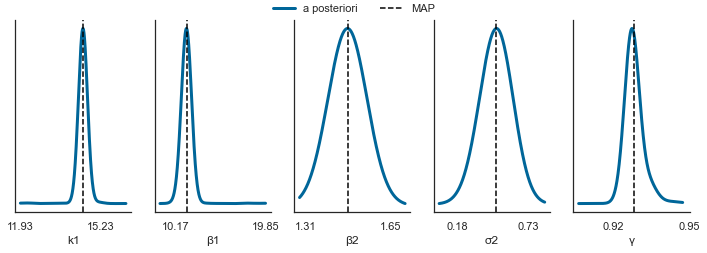

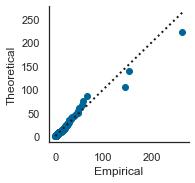

In [170]:
sns.set_theme(style="white")
f.set_ppf()
bs.posterior_plots(f, trace)
plt.savefig("../../SMCLoMo/Figures/posterior_plots_danish_weibull_loglogistic_continuous.pdf", bbox_inches='tight')
bs.qq_plot(X, f, trace.mean().values)
print(log_marg, DIC, WAIC)
trace.mean()

In [172]:
X = danish.values
f1, f2 = bs.loss_model("Weibull", np.array(["k1", "β1"])), bs.loss_model("Log-Logistic", np.array(["β2", "σ2"]))
f = bs.spliced_loss_model(f1, f2, "disjoint")
k1_prior, β1_prior, β2_prior, σ2_prior,  γ_prior, p_prior  = bs.prior_model("gamma", "k1", 1, 1), bs.prior_model("gamma", "β1", 1, 1), bs.prior_model("gamma", "β2", 1, 1), bs.prior_model("gamma", "σ2", 1, 1), \
bs.prior_model("uniform", "γ", min(X), max(X)), bs.prior_model("uniform", "p", 0, 1) 
# The smc function deliver the trace, the log marginal likelihood along with some information criteria
prior_spliced_model = bs.independent_priors([k1_prior, β1_prior, β2_prior, σ2_prior,  γ_prior, p_prior])
popSize = 20000
trace, log_marg, DIC, WAIC = bs.smc(X, f, popSize, prior_spliced_model)

Sample generation 0 from the gamma-gamma-gamma-gamma-uniform-uniform prior distribution
Generation: 1 ;temperature: 0.00024127960205078125 ;ESS: 9991 ;steps:3 ;particle moved: 100.0%
Generation: 2 ;temperature: 0.0008239043131652579 ;ESS: 10007 ;steps:3 ;particle moved: 99.99%
Generation: 3 ;temperature: 0.0017514471622783838 ;ESS: 9994 ;steps:3 ;particle moved: 99.99%
Generation: 4 ;temperature: 0.002949165988055922 ;ESS: 10008 ;steps:3 ;particle moved: 99.97500000000001%
Generation: 5 ;temperature: 0.004494697024242799 ;ESS: 10000 ;steps:3 ;particle moved: 99.91%
Generation: 6 ;temperature: 0.007180869257013987 ;ESS: 9999 ;steps:3 ;particle moved: 99.86%
Generation: 7 ;temperature: 0.012360683157808977 ;ESS: 10000 ;steps:3 ;particle moved: 99.83999999999999%
Generation: 8 ;temperature: 0.02092766913924312 ;ESS: 9999 ;steps:3 ;particle moved: 99.825%
Generation: 9 ;temperature: 0.03388743567963255 ;ESS: 9999 ;steps:3 ;particle moved: 99.80499999999999%
Generation: 10 ;temperature: 0.0

-3822.2492268057586 7572.948498011271 7590.54912384679


k1   2.22
β1   1.75
β2   1.68
σ2   0.93
γ    0.82
p    0.00
dtype: float64

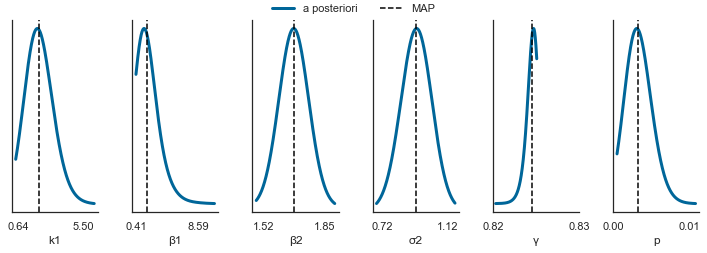

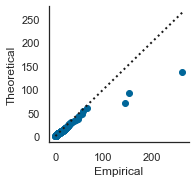

In [176]:
sns.set_theme(style="white")
f.set_ppf()
bs.posterior_plots(f, trace)
plt.savefig("../../SMCLoMo/Figures/posterior_plots_danish_weibull_loglogistic_discontinuous.pdf", bbox_inches='tight')
bs.qq_plot(X, f, trace.mean().values)
print(log_marg, DIC, WAIC)
trace.mean()

## Quantile Quantile plot Exponential and Pareto

In [14]:
X = danish.values
f = bs.loss_model("Exp", np.array(["δ"]))
δ_prior = bs.prior_model("gamma", "δ", 1, 1)
# The smc function deliver the trace, the log marginal likelihood along with some information criteria
prior_single_model = bs.independent_priors([δ_prior])
popSize = 10000
trace, log_marg, DIC, WAIC = bs.smc(X, f, popSize, prior_single_model)

Sample generation 0 from the gamma prior distribution
Generation: 1 ;temperature: 0.0008916854858398438 ;ESS: 4999 ;steps:8 ;particle moved: 99.39%
Generation: 2 ;temperature: 0.007613045084781334 ;ESS: 5000 ;steps:7 ;particle moved: 99.22999999999999%
Generation: 3 ;temperature: 0.05682818133884068 ;ESS: 4999 ;steps:7 ;particle moved: 99.49%
Generation: 4 ;temperature: 0.4360009015139643 ;ESS: 4999 ;steps:7 ;particle moved: 99.47%
Generation: 5 ;temperature: 1.0 ;ESS: 8244 ;steps:7 ;particle moved: 99.29%


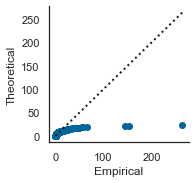

In [15]:
f.set_ppf()
sns.set_theme(style="white")
bs.qq_plot(X, f, trace.mean().values)
plt.savefig("../../SMCLoMo/Figures/qqplot_danish_exp.pdf", bbox_inches='tight')

In [16]:
X = danish.values
f = bs.loss_model("Pareto", np.array(["α", "γ"]))
α_prior, γ_prior  = bs.prior_model("gamma", "α", 1, 1), bs.prior_model("fixed", "γ", min(X), 1)
# The smc function deliver the trace, the log marginal likelihood along with some information criteria
prior_single_model = bs.independent_priors([α_prior, γ_prior])
popSize = 10000
trace, log_marg, DIC, WAIC = bs.smc(X, f, popSize, prior_single_model)

Sample generation 0 from the gamma-fixed prior distribution
Generation: 1 ;temperature: 0.0016145706176757812 ;ESS: 5000 ;steps:6 ;particle moved: 98.91%
Generation: 2 ;temperature: 0.013789830508812884 ;ESS: 5000 ;steps:6 ;particle moved: 99.48%
Generation: 3 ;temperature: 0.10642461829136918 ;ESS: 4999 ;steps:5 ;particle moved: 99.61%
Generation: 4 ;temperature: 0.8070156903724227 ;ESS: 5000 ;steps:6 ;particle moved: 99.39%
Generation: 5 ;temperature: 1.0 ;ESS: 9821 ;steps:6 ;particle moved: 99.45%


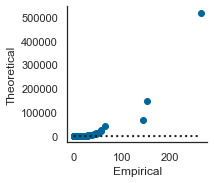

In [17]:
f.set_ppf()
sns.set_theme(style="white")
bs.qq_plot(X, f, trace.mean().values)
plt.savefig("../../SMCLoMo/Figures/qqplot_danish_pareto.pdf", bbox_inches='tight')

In [94]:
X = danish.values
f1, f2 = bs.loss_model("Exp", np.array(["δ"])), bs.loss_model("Pareto-Tail", np.array(["α"]))
f = bs.spliced_loss_model(f1, f2, "continuous")
δ_prior, α_prior, γ_prior  = bs.prior_model("gamma", "δ", 1, 1), bs.prior_model("gamma", "α", 1, 1), bs.prior_model("uniform", "γ", min(X), max(X))
# The smc function deliver the trace, the log marginal likelihood along with some information criteria
prior_spliced_model = bs.independent_priors([δ_prior, α_prior, γ_prior])
popSize = 10000
trace, log_marg, DIC, WAIC = bs.smc(X, f, popSize, prior_spliced_model)

Sample generation 0 from the gamma-gamma-uniform prior distribution
Generation: 1 ;temperature: 9.5367431640625e-07 ;ESS: 3753 ;steps:4 ;particle moved: 99.56%
Generation: 2 ;temperature: 0.0017166129514407658 ;ESS: 4998 ;steps:4 ;particle moved: 99.77000000000001%
Generation: 3 ;temperature: 0.006047342433202556 ;ESS: 4998 ;steps:4 ;particle moved: 99.57000000000001%
Generation: 4 ;temperature: 0.010477076392211584 ;ESS: 4999 ;steps:4 ;particle moved: 98.32%
Generation: 5 ;temperature: 0.015471868468701515 ;ESS: 5000 ;steps:5 ;particle moved: 98.57000000000001%
Generation: 6 ;temperature: 0.027030883326305932 ;ESS: 5000 ;steps:4 ;particle moved: 98.83%
Generation: 7 ;temperature: 0.05757723106327406 ;ESS: 4999 ;steps:3 ;particle moved: 99.05000000000001%
Generation: 8 ;temperature: 0.1212483280581592 ;ESS: 5000 ;steps:3 ;particle moved: 99.07000000000001%
Generation: 9 ;temperature: 0.2585753899705226 ;ESS: 5000 ;steps:3 ;particle moved: 99.02%
Generation: 10 ;temperature: 0.548365805

δ    0.001961
α    1.395065
γ    1.830421
dtype: float64


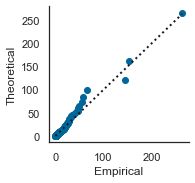

In [92]:
f.set_ppf()
sns.set_theme(style="white")
# print(trace.mean())
bs.qq_plot(X, f, trace.mean().values)
plt.savefig("../../SMCLoMo/Figures/qqplot_danish_exp_pareto.pdf", bbox_inches='tight')

(0.5826645264847512, 0.06942215088282504, 1.832212740355069)

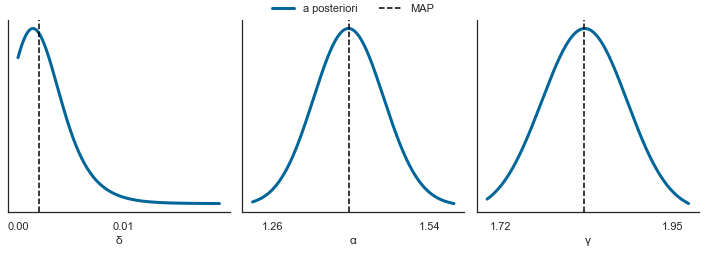

In [28]:
posterior_plots(f, trace)
np.mean(X < trace["γ"].mean()), np.mean(X < 0.93), trace["γ"].mean()

# Fixed threshold

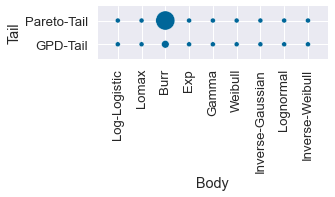

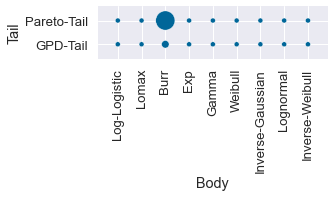

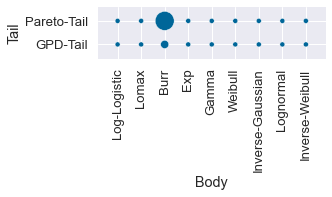

In [162]:
import seaborn as sns
sns.set_theme(style="whitegrid")

compo_model_types = ["discontinuous", "simple", "continuous"]
sns.set(font_scale=1.2)
for compo_model_type in compo_model_types:

    s = np.logical_and(loss_model_df["Type"].values == compo_model_type, loss_model_df["threshold_estimation"].values == "fixed")  
    sub_df = loss_model_df.iloc[s].reset_index(drop=True)
    model_grid(sub_df, "log_marg", 0.05, 0.5)
    fig.tight_layout()
    plt.savefig("../../SMCLoMo/Figures/model_grid_danish_w_"+compo_model_type+"_fixed_threshold.pdf", bbox_inches='tight')

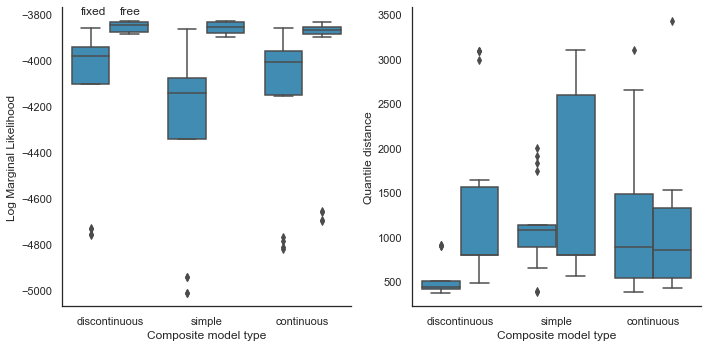

In [164]:
# selec = np.logical_and(loss_model_df["Body"].values != None, loss_model_df["Type"].values != "simple")
selec = np.logical_or(loss_model_df["Tail"].values == "Pareto-Tail", loss_model_df["Tail"].values == "GPD-Tail")
sub_df = loss_model_df.iloc[selec].reset_index(drop=True)

sns.set_theme(style="white")
fig, axs = plt.subplots(1, 2, sharex=True, figsize=(10,5))
g = sns.boxplot(ax = axs[0], x="Type", y="log_marg", hue = "threshold_estimation", data=loss_model_df.iloc[selec])
axs[0].legend([],[], frameon=False)
axs[0].annotate("fixed", xy=(-0.3, -3800))
axs[0].annotate("free", xy=(0.1, -3800))
g.set(xlabel="Composite model type", ylabel="Log Marginal Likelihood")
for i,box in enumerate(g.artists):
    box.set_facecolor((0, 0.4, 0.6, 0.75))
g = sns.boxplot(ax = axs[1], x="Type", y="Wass_dist", hue = "threshold_estimation", data=loss_model_df.iloc[selec])
g.set(xlabel="Composite model type", ylabel="Quantile distance")
for i,box in enumerate(g.artists):
    box.set_facecolor((0, 0.4, 0.6, 0.75))
axs[1].legend([],[], frameon=False)
fig.tight_layout()
sns.despine()
plt.savefig("../../SMCLoMo/Figures/boxplot_danish_log_marg_Wass_fixed_threshold.pdf")